# Graphs and networkx

#### Network analysis
Vast amounts of network data are being generated and collected today. These include click stream data from websites, mobile phone call data, data from social networks (Twitter streams, Facebook updates), vehicular flow data from roadways, and power grid data, to name just a few. In this lab, we will introduce you to networkx which is a “Python package for the creation, manipulation and study of the structure, dynamics and functions of complex networks.” networkx is built on Python — its focus is on computational network modeling. It has many algorithms and models implemented, so you can focus on the analysis problem at hand.

#### Getting started with networkx
Start IPython interactively, or start up your IPython notebook. You will import the networkx package.

In [1]:
import networkx as nx

This command imports the networkx package and allows us to refer to it later as nx. So insteading of typing networkx from now on, we will use the abbreviation nx. Here’s a cartoon that shows off the import directive in Python. The vast functionality of networkx is available for your use!

We will now make a simple graph. There are two types of graphs: undirected and directed graphs. Here we will make an undirected graph g.

In [2]:
g = nx.Graph()
g

g is a graph object created by the constructor Graph(). We can get a list of a graph’s nodes and edges.

In [3]:
g.nodes()

[]

In [4]:
g.edges()

[]

This is an empty graph, because it is has no nodes and no edges. We can grow the graphs in several ways. We can add nodes one at a time, or all at once as shown below.

In [5]:
g.add_node(1)
g.add_nodes_from([2,3])
g.nodes()

[1, 2, 3]

In [6]:
g.add_nodes_from(range(4,11,1))
g.nodes()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

A node can be any hashable object, such as strings, numbers, files, functions and more. This provides great flexibility for computational modeling.

In [7]:
g_new = nx.Graph()
import math
g_new.add_node(math.cos)
g_new.add_node('x')
g_new.nodes()

['x', <function math.cos>]

A graph has nodes and edges between them. Now that we have added nodes to a graph, it is time to add edges. You can add edges one at a time, or add a whole list of edges. An edge is represented as a tuple and an edge list is a list of edge tuples.

In [8]:
g.add_edge(1,2)
g.add_edges_from([(2,3),(3,4)])
for i in range(4,10,1):
    g.add_edge(i,i+1)
g.edges()

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]

If you want to know the number of nodes and edges in a graph, you can use the functions shown below.

In [9]:
g.number_of_nodes()

10

In [10]:
g.number_of_edges()

9

We can annotate nodes and edges with attributes. For example, we can add a weight to an edge as follows. Weights should always be numeric. networkx represents attributes as a dictionary associated with a node or an edge.

In [11]:
g[1][2]['weight'] = 1.0 # edge already present
g[1][2]

{'weight': 1.0}

In [12]:
for i in range(2,10,1):
    g[i][i+1]['weight'] = i*1.0
g.node[1]['name']='one'
g.node[1]

{'name': 'one'}

Many computations require you to iterate over the nodes and edges of a graph. networkx makes it easy to do that. To name every node in the graph g, we define a list of names and iterate over the nodes as shown.

In [13]:
names = ['one','two','three','four','five','six','seven','eight','nine','ten']
for node in g.nodes():
    g.node[node]['name'] = names[node-1]

To print all the edge weights, we can iterate over the edges in g. Note how we unpack each edge as a pair of nodes in the for loop.

In [14]:
for u,v in g.edges():
    print u,v, g[u][v]['weight']

1 2 1.0
2 3 2.0
3 4 3.0
4 5 4.0
5 6 5.0
6 7 6.0
7 8 7.0
8 9 8.0
9 10 9.0


To find neighbors of a particular node, we use the neighbors function. To get the neighbors of every node in g, we use the iterator on nodes.

In [15]:
for node in g.nodes():
    print node, g.neighbors(node)

1 [2]
2 [1, 3]
3 [2, 4]
4 [3, 5]
5 [4, 6]
6 [5, 7]
7 [8, 6]
8 [9, 7]
9 [8, 10]
10 [9]


#### The bridges of Konigsberg
To model the bridges of Konigsberg problem that Euler solved, we need a graph that supports multiple edges between nodes. Such a graph is called a multigraph. We set up the graph with four nodes and edges labeled by bridges

In [16]:
mg = nx.MultiGraph()
mg.add_nodes_from(['A','B','C','D'])
mg.add_edge('A','C','b1')
mg.add_edge('A','C','b2')
mg.add_edge('A','D','b4')
mg.add_edge('A','D','b5')
mg.add_edge('A','B','b7')
mg.add_edge('C','B','b3')
mg.add_edge('D','B','b6')

Now we can check if there is a walk through the city that crosses each bridge once and only once, and begins and ends at the same point. Such a walk is called an Eulerian circuit of a multigraph. The networkx function is_eulerian computes whether or not a Eulerian circuit exists in a multigraph.

In [17]:
nx.is_eulerian(mg)

False

#### Drawing graphs
NetworkX is not primarily a graph drawing package but it provides basic drawing capabilities by using matplotlib. If you are using IPython notebook you do not need plt.show(). If you are on an IPython terminal, you do need it.

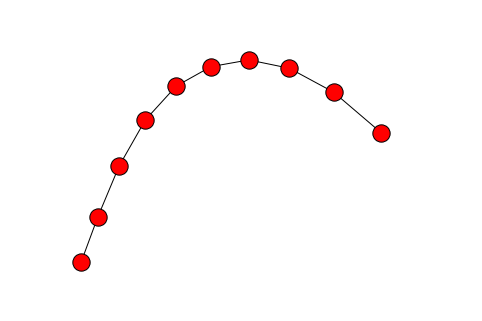

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(g)
plt.show()

Drawing large graphs is hard and networkx has a number of algorithms for laying out nodes. Here are four of them. After each draw statement, use plt.show() to see the graph.

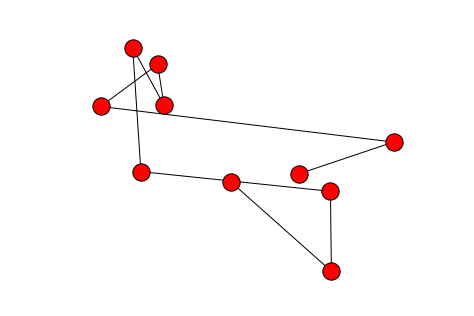

In [27]:
nx.draw_random(g)

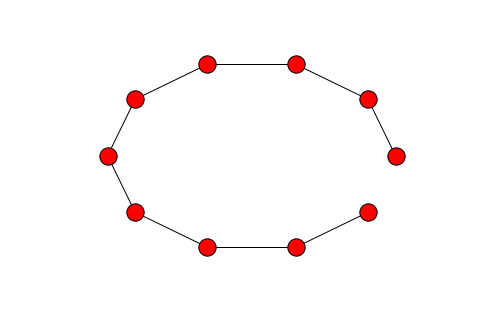

In [28]:
nx.draw_circular(g)


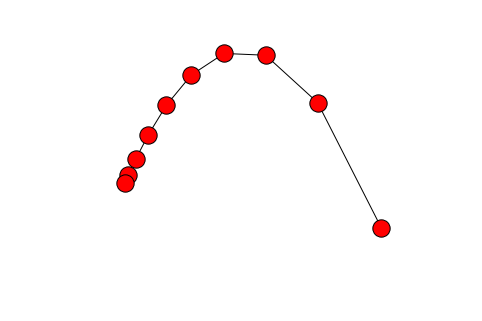

In [29]:
nx.draw_spectral(g)


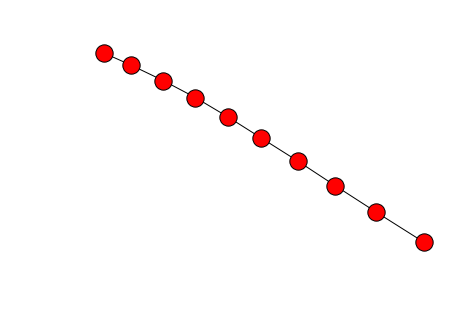

In [30]:
nx.draw_spring(g)

The spring layout produces some of the most visually pleasing graphs. However, do check the other layout algorithms too for your specific graph. Once you settle on a graph layout you like, you can save the figure using the savefig function.

In [31]:
plt.savefig('g.png')

#### Basic network analysis
For this section, we will play with a network which represents the topology of the power grid of Western States of the US. Download the file power.gml and save it in your Lab04 folder. This graph was compiled by Duncan Watts and Steven Strogatz of Columbia University. We will first read the graph and create a corresponding networkx graph object.

In [32]:
G = nx.path_graph(4)
nx.write_gml(G, 'test.gml')
power_grid = nx.read_gml('test.gml')

#### Exercise 1
How many nodes and edges are in the graph power_grid?

The degree of a node in a graph is the number of nodes that it is connected to by an edge, i.e., the number of neighbors it has. networkx has a function called degree that gives the degree of a node in a graph. To get the degree of node 0 in power_grid type in the expression below.

In [33]:
power_grid.degree(0)

1

To get the degree of all the nodes in a graph, use the degree function without an input argument. You get back a dictionary keyed by the nodes of the graph, whose values are the degrees of the nodes.

In [34]:
d = power_grid.degree()
type(d)

dict

The average degree of an undirected graph is the sum of the degrees of all its nodes divided by the number of nodes in the graph. It is a measure of the connectedness of a graph.

#### Exercise 2
Write a function average_degree to compute the average degree of a networkx graph G. Use the function to calculate the average degree of the graph power_grid. Remember to use floating point division.

In [35]:
def average_degree(G):
    return

Sometimes, the average degree does not reveal enough about the structure of a graph. Examining the distribution of degrees through the nodes of a graph is a much more useful measure. For instance, it would be helpful to know if almost all the nodes have degrees near the average degree, or if there are a few nodes with significantly higher degrees in the graph. The networkx function degree_histogram generates a list of length equal to the maximum degree in the graph. Element i of the list is the count of nodes with degree i. Use help(nx.degree_histogram) to learn how to use the function. To plot the histogram it is easier to work with the dictionary of degrees we generated above.

#### Exercise 3
Use the degree function in networkx to compute the dictionary d of degrees for nodes in power_grid. Then use the hist function in matplotlib.pyplot to draw it. The hist function expects a list of values; so remember to extract the values using d.values().

- What do you observe about the distribution of degrees in the graph?

- Write a Python function find_nodes_with_degree which takes a graph and an integer N as input and returns a list of all the nodes in the graph which degree N. Find the node(s) with the highest degree in power_grid.

A connected component of a graph is a subgraph where every node can be reached from every other node. There is a networkx function to find all the connected components of a graph.

In [36]:
cc = nx.connected_component_subgraphs(power_grid)

TypeError: object of type 'generator' has no len()

#### Exercise 4
The diameter of a connected component of a graph is the longest shortest path in the graph. The networkx function diameter computes this property. The diameter helps us understand how wide the graph is.

In [ ]:
nx.diameter(power_grid)

This function may take a while to finish on a graph as large as power_grid.

The center of a graph is a most centrally located node in the graph. A center is a node whose maximum distance from every other node in the graph is the least compared to all other nodes.

In [ ]:
nx.center(power_grid)

- What is the diameter of the power_grid graph?

- How many centers does power_grid have? Are the centers related to the nodes with highest degree in this graph?

#### Exercise 5
networkx gives you the ability to construct subgraphs. For the power_grid graph, find all nodes that have degree greater than or equal to 10. Construct the subgraph of power_grid on these high degree nodes, using the networkx function subgraph which takes two inputs: a network and a subset of the nodes. Use help(nx.subgraph) to find how to construct the subgraph.

- How many connected components does the subgraph have?

- What is the size of the largest component?

- Draw the largest component and save the figure as “largest_connected_component.png”.


#### Exercise 6: Graph construction exercises

- Write a function called make_largest_diameter_graph which takes an integer N as input and returns an undirected networkx graph with N nodes that has the largest possible diameter. Print the graph’s average degree and its centers for N = 10. Draw the graph for N = 10 and save it as “largest_diameter_10.png”.


- Write a function called make_smallest_diameter_graph which takes an integer N as input and returns an undirected networkx graph with N nodes that has the smallest possible diameter. Print the graph’s average degree and its centers for N = 10. Draw the graph for N = 10 and save it as “smallest_diameter_10.png”.


- Write a function called make_circle_graph which takes an integer N as input and returns an undirected networkx graph with N nodes in a circle. Print the graph’s average degree and its centers for N = 10. Draw the graph for N = 10 and save it as “circle_10.png”.


- Write a function called make_complete_graph which takes an integer N and returns an undirected networkx graph with N nodes where each node is connected to every other node in the graph. Print the graph’s centers for N = 10. Do not use the networkx built-in function to make a complete graph! Draw the graph for N = 10 and save it as “complete_graph_10.png”.


- Write a function called make_erdos_renyi_graph which takes an integer N and a probability p (between 0.0 and 1.0) and returns an undirected Erdos-Renyi networkx graph with N nodes constructed according to the following recipe.




    G <- empty undirected graph
    add nodes [0,...,N-1] to G.
    for i in [0,...,N-1]
       for j in [i+1,...,N-1]
           r <- pick a uniform random number in [0,1]
           if r < p then add an edge between nodes i and j

- For N = 100 and for p ranging from 0.005 to 0.1 in steps of 0.01, find the number of connected components in the Erdos-Renyi graph of size N with probability p. Use matplotlib to plot p on the x axis and the number of connected components on the y axis. What do you observe about this plot?